In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

In [21]:
from keras.datasets import cifar100

In [22]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [25]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
from keras.utils import to_categorical
y_train_bin = to_categorical(y_train, 100)
y_test_bin = to_categorical(y_test, 100)

In [29]:
y_train_bin.shape

(50000, 100)

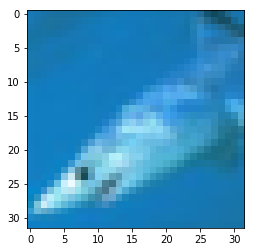

In [30]:
# need to move 
X_image = x_train[50]

plt.imshow(X_image)

In [31]:
y_train[50]

array([73])

In [32]:
x_train.shape

(50000, 32, 32, 3)

### MLP

In [14]:
input_shape = x_train.shape[1:]
num_classes = y_train_bin.shape[1:]
num_classes = num_classes[0]

In [15]:
model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)      

In [16]:
history = model.fit(x_train, y_train_bin,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 290us/step - loss: 15.9555 - acc: 0.0101 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/10
50000/50000 [==============================] - 14s 275us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/10
50000/50000 [==============================] - 14s 282us/step - loss: 15.9572 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/10
50000/50000 [==============================] - 15s 301us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/10
50000/50000 [==============================] - 17s 342us/step - loss: 15.9566 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 6/10
50000/50000 [==============================] - 15s 298us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 7/10
50000/50000 [==============================] 

### CNN

In [33]:
num_classes = y_train_bin.shape[1:][0]
num_epochs = 5
batchsize = 32

In [34]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:],
                 data_format='channels_last',
                padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',
                padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',
                padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu',
                padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.001,decay=1e-6),
              metrics=['accuracy'])


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4194432   
__________

In [35]:
model.fit(x_train, y_train_bin,
          batch_size=batchsize,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1172s 23ms/step - loss: 3.8844 - acc: 0.1145 - val_loss: 3.3096 - val_acc: 0.2099
Epoch 2/5
50000/50000 [==============================] - 1223s 24ms/step - loss: 3.1459 - acc: 0.2383 - val_loss: 2.9117 - val_acc: 0.2847
Epoch 3/5
50000/50000 [==============================] - 1097s 22ms/step - loss: 2.7978 - acc: 0.3018 - val_loss: 2.7086 - val_acc: 0.3224
Epoch 4/5
50000/50000 [==============================] - 1039s 21ms/step - loss: 2.5817 - acc: 0.3462 - val_loss: 2.9400 - val_acc: 0.3144
Epoch 5/5
50000/50000 [==============================] - 1056s 21ms/step - loss: 2.4408 - acc: 0.3829 - val_loss: 2.8101 - val_acc: 0.3232
Test loss: 2.810092015838623
Test accuracy: 0.3232


65.59% accuracy on the test dataset for Cifar10

32.32% accuracy on the test dataset for Cifar100

### External model to check CNN - issue with data ingestion

In [18]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [19]:
batch_size = 32
num_classes = 100
epochs = 5
data_augmentation = False
# num_predictions = 20
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.summary()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [20]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 246s 5ms/step - loss: 4.3262 - acc: 0.0430 - val_loss: 3.9490 - val_acc: 0.1167
Epoch 2/5
50000/50000 [==============================] - 252s 5ms/step - loss: 3.8645 - acc: 0.1102 - val_loss: 3.6380 - val_acc: 0.1618
Epoch 3/5
50000/50000 [==============================] - 260s 5ms/step - loss: 3.6204 - acc: 0.1480 - val_loss: 3.4254 - val_acc: 0.2005
Epoch 4/5
50000/50000 [==============================] - 250s 5ms/step - loss: 3.4570 - acc: 0.1770 - val_loss: 3.2750 - val_acc: 0.2241
Epoch 5/5
50000/50000 [==============================] - 250s 5ms/step - loss: 3.3202 - acc: 0.2018 - val_loss: 3.1197 - val_acc: 0.2571


25.71% accuracy on the test set for cifar100

The model I built is actually 7% points higher than the external (test) model. I am running more filters on the Convulutional 2D layers than the test model, so it makes sense it would be more accurate. However, it takes about 5x as long to run as the test model. So this is a perfect example of trade-offs between accuracy and time to complete.